<a id='top'></a>

# CSCI3022 F21
# Homework 6: Confidence Intervals and Multiple Testing
***

**Name**: Caleb Starkey
***

This assignment is due on Canvas (as .ipynb) and Gradescope (as a .pdf) by **MIDNIGHT on Mon 1 Nov**. Your solutions to theoretical questions should be done in Markdown directly below the associated question.  Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  Remember that you are encouraged to discuss the problems with your classmates, but **you must write all code and solutions on your own**.

**NOTES**: 

- Any relevant data sets should be available on Canvas. To make life easier on the graders if they need to run your code, do not change the relative path names here. Instead, move the files around on your computer.
- If you're not familiar with typesetting math directly into Markdown then by all means, do your work on paper first and then typeset it later.  Here is a [reference guide](https://math.meta.stackexchange.com/questions/5020/mathjax-basic-tutorial-and-quick-reference) linked on Canvas on writing math in Markdown. **All** of your written commentary, justifications and mathematical work should be in Markdown.  I also recommend the [wikibook](https://en.wikibooks.org/wiki/LaTeX) for LaTex.
- Because you can technically evaluate notebook cells is a non-linear order, it's a good idea to do **Kernel $\rightarrow$ Restart & Run All** as a check before submitting your solutions.  That way if we need to run your code you will know that it will work as expected. 
- It is **bad form** to make your reader interpret numerical output from your code.  If a question asks you to compute some value from the data you should show your code output **AND** write a summary of the results in Markdown directly below your code. 
- 45 points of this assignment are in problems.  The remaining 5 are for neatness, style, and overall exposition of both code and text.
- This probably goes without saying, but... For any question that asks you to calculate something, you **must show all work and justify your answers to receive credit**. Sparse or nonexistent work will receive sparse or nonexistent credit. 

---
**Shortcuts:**  [Problem 1](#p1) | [Problem 2](#p2) | [Problem 3](#p3) |
---

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import scipy.stats as stats
import itertools #for looping, if desired
%matplotlib inline

[Back to top](#top)
<a/ id='p1'></a>

## (10 pts) Problem 1: Confidence Interval Theory

**Part A** (3 pts):
In general, which is wider: a 95% confidence interval or a 99% confidence interval? How would you explain this to your younger sibling, who is not a statistician?   Use **plain English**.

A 99% confidence interval is wider. If we think of it like a dart board, your more confident of being able to hit the dartboard every throw then you are of hitting the bullseye ever throw. Confidence intervals are in a way similar, we can be more confident of "hitting the target" (the mean being within the bounds we define) if we have a larger "area to hit" (bounds).

**Part B** (3 pts):

Let $X_1, X_2, \dots X_n$ be independent and identically distributed sample from a normal random variable $N(\mu,1)$.


As you've seen, A 95% confidence interval for 
$\mu$ is $\bar{x} \pm 1.96 \cdot \frac{1}{\sqrt{n}}$.
Let $p$ denote the probability that an *additional* (or new) independent observation falls within this confidence interval. Is $p$ greater than, less than, or equal to 0.95? Justify your answer with both intuition and a formal mathematical statement.

Less than, because the bounds are going to decrease in size do to the increase in n.
$$ .95 = (\bar{x}_n + 1.96 \cdot \frac{1}{\sqrt{n}} \leq \mu \leq \bar{x}_n - 1.96 \cdot \frac{1}{\sqrt{n}})$$
$$p = (\bar{x}_n + 1.96 \cdot \frac{1}{\sqrt{n}} \leq \bar{x}_{n+1}\leq \bar{x}_n - 1.96 \cdot \frac{1}{\sqrt{n}})$$

**Part C** (4 pts):
Suppose that 14 people in a sample of 91 are found to be smokers. Calculate the 90% confidence interval for the true proportion of smokers in the population from which this sample originated. Interpret this interval in a plain English sentence.

$$\hat{p} \pm z_{\alpha-1}\sqrt{\frac{\hat{p}(\hat{p}-1)}{n}}$$
$$\frac{14}{91} \pm z_{.95}\sqrt{\frac{\frac{14}{91}(1-\frac{14}{91})}{91}}$$
$$\frac{14}{91} \pm 1.645\sqrt{\frac{\frac{14}{91}(1-\frac{14}{91})}{91}}$$
$$.154 \pm .0622$$ 
With the data from our sample we can be 90% confident that the true porportion of smokers in a population is $.154\pm.0622$

In [2]:
stats.norm.ppf(.95)

1.6448536269514722

[Back to top](#top)
<a/ id='p2'></a>

## (20 pts) Problem 2: Using Confidence Intervals (Data)


Below is one of the most famous datasets in machine learning, the Iris Flower data set gathered by Edgar Anderson to measure physical characterstics of 3 variants of Iris.  It was initially popularized by statistician Ronald Fisher and is regularly used in validating and testing different forms of data science algorithms.  In each case, we're usually interested in determining: can we use the properties in the data set

1) sepal length (cm)

2) sepal width (cm)

3) petal length (cm)

4) petal width (cm)

to predict or describe **which** flower (in the `target` column) belongs to which group.

...we aren't going to do prediction yet.

We will instead use confidence intervals for the means of each of the 4 measurements for each of the 3 flower types and see if we can *detect* that the flowers have different mean values for each measurement. 

In [3]:
from sklearn.datasets import load_iris
#With a recent install of sklearn and pandas, this line will make your data frame
df = load_iris(as_frame=True)['frame']

#NOTE: if using an older version of python/SKL, you may need to run these instead:
# dat = load_iris()
# df = pd.DataFrame(data=dat.data, columns=dat.feature_names)
# df['target']=dat.target
df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


**Part A:**
Create a table of comparisons that hold the confidence intervals for the difference in means $\mu_A-\mu_B$ across each measurement for each pair of flowers.  In other words, fill in the following table:

|CI: | $\mu_0$ vs. $\mu_1$ | $\mu_0$ vs. $\mu_2$ | $\mu_1$ vs. $\mu_2$ |
| --- | --- | --- | --- |
|sepal length | (CI,CI) | (CI,CI)  | (CI,CI)  |
|sepal width | (CI,CI) | (CI,CI)  | (CI,CI)  |
|petal length | (CI,CI) | (CI,CI)  | (CI,CI)  |
|petal width | (CI,CI) | (CI,CI)  | (CI,CI)  |



In [4]:

def calcCi(u1,u2,hlp1,hlp2):
    pooledStd = 1.96*np.sqrt(hlp1+hlp2)
    return(((u1-u2)+pooledStd),((u1-u2)-pooledStd))
zero_sepalL_mean = df.loc[df["target"] == 0, "sepal length (cm)"].mean()
one_sepalL_mean = df.loc[df["target"] == 1, "sepal length (cm)"].mean()
two_sepalL_mean = df.loc[df["target"] == 2, "sepal length (cm)"].mean()

zero_sepalW_mean = df.loc[df["target"] == 0, "sepal width (cm)"].mean()
one_sepalW_mean = df.loc[df["target"] == 1, "sepal width (cm)"].mean()
two_sepalW_mean = df.loc[df["target"] == 2, "sepal width (cm)"].mean()

zero_petalL_mean = df.loc[df["target"] == 0, "petal length (cm)"].mean()
one_petalL_mean = df.loc[df["target"] == 1, "petal length (cm)"].mean()
two_petalL_mean = df.loc[df["target"] == 2, "petal length (cm)"].mean()

zero_petalW_mean = df.loc[df["target"] == 0, "petal width (cm)"].mean()
one_petalW_mean = df.loc[df["target"] == 1, "petal width (cm)"].mean()
two_petalW_mean = df.loc[df["target"] == 2, "petal width (cm)"].mean()

zero_sepalL_hlp = (df.loc[df["target"] == 0, "sepal length (cm)"].std()**2)/50
one_sepalL_hlp = (df.loc[df["target"] == 1, "sepal length (cm)"].std()**2)/50
two_sepalL_hlp = (df.loc[df["target"] == 2, "sepal length (cm)"].std()**2)/50

zero_sepalW_hlp = (df.loc[df["target"] == 0, "sepal width (cm)"].std()**2)/50
one_sepalW_hlp = (df.loc[df["target"] == 1, "sepal width (cm)"].std()**2)/50
two_sepalW_hlp = (df.loc[df["target"] == 2, "sepal width (cm)"].std()**2)/50

zero_petalL_hlp = (df.loc[df["target"] == 0, "petal length (cm)"].std()**2)/50
one_petalL_hlp = (df.loc[df["target"] == 1, "petal length (cm)"].std()**2)/50
two_petalL_hlp = (df.loc[df["target"] == 2, "petal length (cm)"].std()**2)/50

zero_petalW_hlp = (df.loc[df["target"] == 0, "petal width (cm)"].std()**2)/50
one_petalW_hlp = (df.loc[df["target"] == 1, "petal width (cm)"].std()**2)/50
two_petalW_hlp = (df.loc[df["target"] == 2, "petal width (cm)"].std()**2)/50

sepalL = []
sepalW = []
petalL = []
petalW = []

sepalL.append(calcCi(zero_sepalL_mean,one_sepalL_mean,zero_sepalL_hlp,one_sepalL_hlp))
sepalL.append(calcCi(zero_sepalL_mean,two_sepalL_mean,zero_sepalL_hlp,two_sepalL_hlp))
sepalL.append(calcCi(one_sepalL_mean,two_sepalL_mean,one_sepalL_hlp,two_sepalL_hlp))

sepalW.append(calcCi(zero_sepalW_mean,one_sepalW_mean,zero_sepalW_hlp,one_sepalW_hlp))
sepalW.append(calcCi(zero_sepalW_mean,two_sepalW_mean,zero_sepalW_hlp,two_sepalW_hlp))
sepalW.append(calcCi(one_sepalW_mean,two_sepalW_mean,one_sepalW_hlp,two_sepalW_hlp))

petalL.append(calcCi(zero_petalL_mean,one_petalL_mean,zero_petalL_hlp,one_petalL_hlp))
petalL.append(calcCi(zero_petalL_mean,two_petalL_mean,zero_petalL_hlp,two_petalL_hlp))
petalL.append(calcCi(one_petalL_mean,two_petalL_mean,one_petalL_hlp,two_petalL_hlp))

petalW.append(calcCi(zero_petalW_mean,one_petalW_mean,zero_petalW_hlp,one_petalW_hlp))
petalW.append(calcCi(zero_petalW_mean,two_petalW_mean,zero_petalW_hlp,two_petalW_hlp))
petalW.append(calcCi(one_petalW_mean,two_petalW_mean,one_petalW_hlp,two_petalW_hlp))

cI = {'':['sepalL','sepalW','petalL','petalW'], 'u0 vs. u1': [sepalL[0], sepalW[0], petalL[0], petalW[0]], 'u0 vs. u2': [sepalL[1], sepalW[1], petalL[1], petalW[1]], 'u1 vs. u2':[sepalL[2], sepalW[2], petalL[2], petalW[2]]}
dfCi = pd.DataFrame(cI)
dfCi.head()

,,u0 vs. u1,u0 vs. u2,u1 vs. u2
0,sepalL,"(-0.7567462808480009, -1.1032537191520004)","(-1.380473902434448, -1.78352609756555)","(-0.4249823266791751, -0.8790176733208216)"
1,sepalW,"(0.7944022521808203, 0.5215977478191804)","(0.5919522236138305, 0.31604777638617165)","(-0.07927453507803556, -0.32872546492196303)"
2,petalL,"(-2.659136936516581, -2.9368630634834183)","(-3.929627693163688, -4.2503723068363115)","(-1.091082488568069, -1.4929175114319306)"
3,petalW,"(-1.0178879464193944, -1.1421120535806053)","(-1.698458923234973, -1.8615410767650267)","(-0.6061903885521318, -0.7938096114478681)"


**Part B:** 
For each **pair** of iris types, how many of their characteristics differed versus were the same?  You should find that we are typically able to differentiate the **means** of the flowers.

Make two side-by-side plots of the data, where the left-hand plot is of sepal width vs. sepal length and the right-hand plot is of petal width vs. petal length.  Color each plot by the `target` column of flower type.  *Classfication* problems are often interested in more than just the means, but how well we could differentiate between the individual flowers, which may overlap on an individual-by-individual basis!

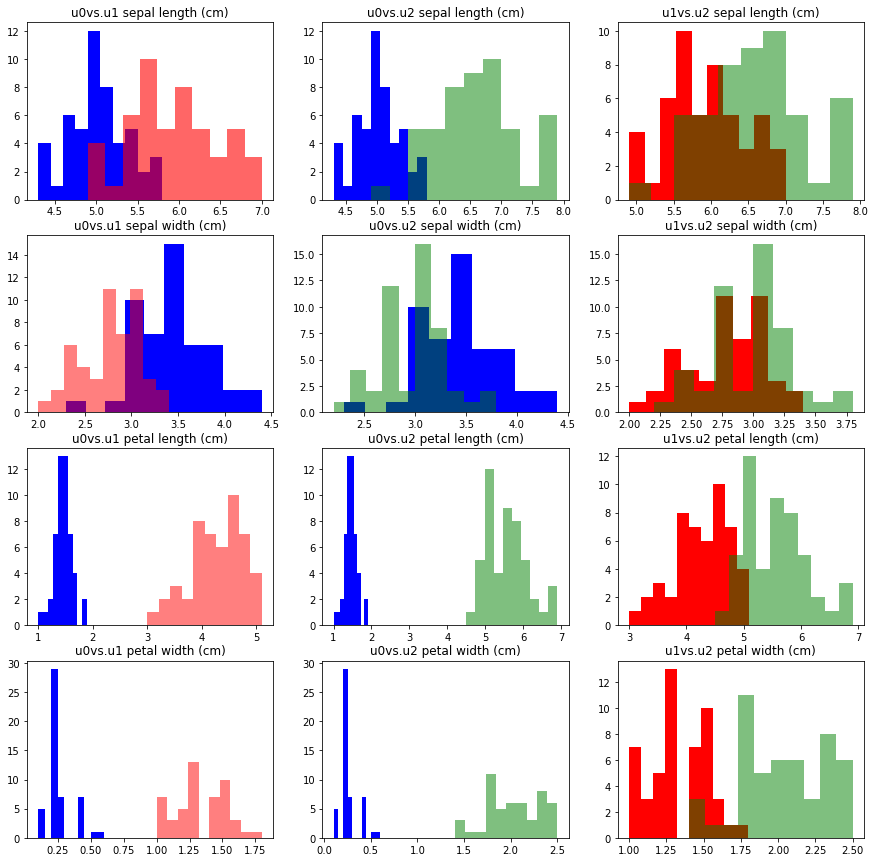

In [5]:
fig,(((ax0), (ax1) , (ax2)), ((ax3), (ax4), (ax5)), ((ax6), (ax7), (ax8)), ((ax9), (ax10), (ax11))) = plt.subplots(4,3)
fig.set_figwidth(15)
fig.set_figheight(15)

ax0.hist(df.loc[df["target"] == 0, "sepal length (cm)"],color="blue")
ax0.hist(df.loc[df["target"] == 1, "sepal length (cm)"],color="red",alpha=.6)
ax0.set_title("u0vs.u1 sepal length (cm)")
ax1.hist(df.loc[df["target"] == 0, "sepal length (cm)"],color="blue")
ax1.hist(df.loc[df["target"] == 2, "sepal length (cm)"],color="green",alpha=.5)
ax1.set_title("u0vs.u2 sepal length (cm)")
ax2.hist(df.loc[df["target"] == 1, "sepal length (cm)"],color="red")
ax2.hist(df.loc[df["target"] == 2, "sepal length (cm)"],color="green",alpha=.5)
ax2.set_title("u1vs.u2 sepal length (cm)")


ax3.hist(df.loc[df["target"] == 0, "sepal width (cm)"],color="blue")
ax3.hist(df.loc[df["target"] == 1, "sepal width (cm)"],color="red",alpha=.5)
ax3.set_title("u0vs.u1 sepal width (cm)")
ax4.hist(df.loc[df["target"] == 0, "sepal width (cm)"],color="blue")
ax4.hist(df.loc[df["target"] == 2, "sepal width (cm)"],color="green",alpha=.5)
ax4.set_title("u0vs.u2 sepal width (cm)")
ax5.hist(df.loc[df["target"] == 1, "sepal width (cm)"],color="red")
ax5.hist(df.loc[df["target"] == 2, "sepal width (cm)"],color="green",alpha=.5)
ax5.set_title("u1vs.u2 sepal width (cm)")

ax6.hist(df.loc[df["target"] == 0, "petal length (cm)"],color="blue")
ax6.hist(df.loc[df["target"] == 1, "petal length (cm)"],color="red",alpha=.5)
ax6.set_title("u0vs.u1 petal length (cm)")
ax7.hist(df.loc[df["target"] == 0, "petal length (cm)"],color="blue")
ax7.hist(df.loc[df["target"] == 2, "petal length (cm)"],color="green",alpha=.5)
ax7.set_title("u0vs.u2 petal length (cm)")
ax8.hist(df.loc[df["target"] == 1, "petal length (cm)"],color="red")
ax8.hist(df.loc[df["target"] == 2, "petal length (cm)"],color="green",alpha=.5)
ax8.set_title("u1vs.u2 petal length (cm)")

ax9.hist(df.loc[df["target"] == 0, "petal width (cm)"],color="blue")
ax9.hist(df.loc[df["target"] == 1, "petal width (cm)"],color="red",alpha=.5)
ax9.set_title("u0vs.u1 petal width (cm)")
ax10.hist(df.loc[df["target"] == 0, "petal width (cm)"],color="blue")
ax10.hist(df.loc[df["target"] == 2, "petal width (cm)"],color="green",alpha=.5)
ax10.set_title("u0vs.u2 petal width (cm)")
ax11.hist(df.loc[df["target"] == 1, "petal width (cm)"],color="red")
ax11.hist(df.loc[df["target"] == 2, "petal width (cm)"],color="green",alpha=.5)
ax11.set_title("u1vs.u2 petal width (cm)")
plt.show()

**Part C:** 
The above table had 12 different confidence intervals to draw, and we allowed each to have a confidence of 95%.  What is the probability that each and every interval contained the true $\mu$?

*Hint: this is **not** the same question as follows in Part D*

$.95^{12} = .54$

**Part D:** 
Suppose we are planning to gather a large data set, where we will construct 12 confidence intervals for the respective means $\mu_i$ of 12 independent random samples, each of which is constructed at a 95% confidence.

What is the probability that **at least one** interval does not end up covering the true mean $\mu$ for that feature?

$\binom{12}{1}(1-.95)^{1}(.95)^{12-1} = .341$ probability that atleast one interval does not cover the true mean $\mu$

In [6]:
stats.binom.pmf(1,12,0.05)

0.3412800553658753

[Back to top](#top)
<a/ id='p3'></a>

## (15 pts) Problem 3: Simulation of Random Variables (Simulation)

The CDF is a function $F(x)$ where we input *outcomes* $x$ and we get probabilities regarding those outcomes (specifically, the probability of all possible outcomes up to $x$).  But this is a question we also often want to ask **backwards**: given a probability, can we specify the $x$ value that holds "that much" of the probability of $X$?  The CDF is a function with a domain of "possible values of $X$" and a range of [0,1] since it returns probabilities.  Its inverse function, then, has domain [0,1] and range over all the $X$ values.  This inverse function is the function that we could input probabilities to and it would tell us about corresponding $X$-values.

This is how random variables are often created by your computer, which is itself (generally) only good at creating random continuous uniforms $Y\sim[0,1]$.  But if we consider $Y$ as a random *probability*, we can convert it into an *outcome* of a random variable by plugging it into the inverse of the cdf.

**Part A:**

You've seen the inverse of the cdf before when the random variables were normally distributed!  This is exactly what lives in `stats.norm.ppf(x)`.

Simulate 10,000 random uniforms on [0,1] using numpy's `np.random.rand`.  Then plug them into `stats.norm.ppf(x)` and create a histogram of the results, overlaying the pdf of the standard normal.  Does it look like this converted your uniforms into random normals?

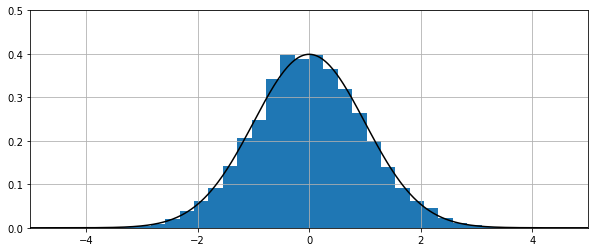

In [7]:
data = np.random.rand(10000)
data = stats.norm.ppf(data)
normData = np.linspace(-5,5,500)
normDataf = stats.norm.pdf(normData,0,1)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,4))
pd.Series(data).hist(bins=30,density=True)
#plt.hist(data,bins=30)
ax.set_xlim([-5,5])
ax.set_ylim([0,.5])
ax.plot(normData,normDataf,color = 'Black')

plt.show()

**Part B:**

To turn random uniforms into *any* random variable, we just need to actually compute by hand the .ppf function.  Take, for example, the exponential distribution, given by:

$$f(x)= \lambda e^{-\lambda x} \quad \text{ for } x \geq 0$$

Compute **by hand** the cdf of the exponential distribution, and find that functions' *inverse*.  

(Recall: the inverse of a function $y=f(x)$ can be found in practice by "swapping" $y$ and $x$ and then solving for $y$ in its new location.)

**Solution Markdown**:
$$\int_{0}^{x}xf(x)dx$$
$$\int_{0}^{x}x\lambda e^{-\lambda x}dx$$
$$\lambda\int_{0}^{x}x e^{-\lambda x}dx$$
$$let u = -\lambda x$$
$$\lambda\int_{0}^{-\lambda x}\frac{-e^{u}}{\lambda}du$$
$$\lambda(\frac{-1}{\lambda}e^u\Bigr|^{-\lambda x}_{0})$$
$$-(e^u\Bigr|^{-\lambda x}_{0})$$
$$ -(e^{0} - e^{-\lambda x })$$
$$ cdf = e^{-\lambda x}-1$$
$$ x =e^{-\lambda y} - 1$$
$$ x + 1 = e^{-\lambda y}$$
$$ ln(x+1) = -\lambda y$$
$$ \frac{ln(x+1)}{-\lambda} = y$$

**Part C:**

1) Simulate 10,000 random uniforms on [0,1] using numpy's `np.random.rand`.  Then plug them into `stats.expon.ppf` for $\lambda=3$ and create a (density) histogram of the results

2) Simulate another 10,000 random uniforms on [0,1] using numpy's `np.random.rand`.  Then plug them into the inverse cdf with $\lambda=3$ you found by hand in part **B**, and overlay a (density) histogram of the results on your already created plot.

3) Overlay the pdf of the $\lambda=3$ exponential random variable

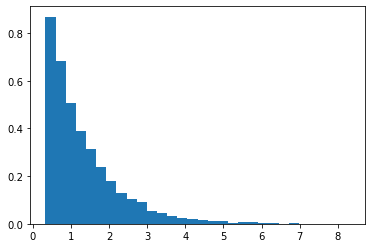

In [8]:
data = np.random.rand(10000)
data = stats.expon.ppf(data,1/3)
plt.hist(data, bins=30,density = True)
plt.show()

(array([460., 432., 460., 396., 390., 408., 432., 385., 358., 384., 354.,
        385., 366., 304., 315., 323., 322., 286., 332., 284., 276., 290.,
        268., 298., 280., 244., 243., 244., 246., 235.]),
 array([-2.31044869e-01, -2.23344112e-01, -2.15643355e-01, -2.07942597e-01,
        -2.00241840e-01, -1.92541083e-01, -1.84840325e-01, -1.77139568e-01,
        -1.69438811e-01, -1.61738053e-01, -1.54037296e-01, -1.46336539e-01,
        -1.38635782e-01, -1.30935024e-01, -1.23234267e-01, -1.15533510e-01,
        -1.07832752e-01, -1.00131995e-01, -9.24312377e-02, -8.47304804e-02,
        -7.70297231e-02, -6.93289658e-02, -6.16282085e-02, -5.39274512e-02,
        -4.62266939e-02, -3.85259366e-02, -3.08251793e-02, -2.31244220e-02,
        -1.54236647e-02, -7.72290735e-03, -2.21500487e-05]),
 <BarContainer object of 30 artists>)

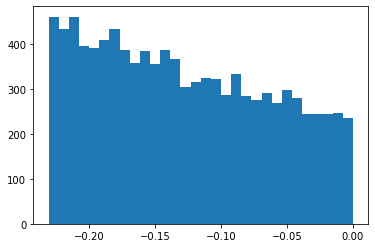

In [9]:
def inverseCdf(x,lam):
    return(np.log(x+1)/-(lam))



inverseData = np.random.rand(10000)
inverseDataCdf = []
for x in inverseData:
    inverseDataCdf.append(inverseCdf(x,3))

plt.hist(inverseDataCdf, bins=30)

**Part D:**

Suppose we have a *Bernoulli* random variable $X$ with probability $p=.7$.  Plot the cdf of this random variable.  What would be the inverse of this function?

Could we still use the logic of the earlier parts of the problem to convert a $Y\sim[0,1]$ random variable into a Bernoulli?  Explain, and explain how such a process might generalize to other discrete random variables such as the Geometric.

(array([  2.,  11.,  35., 100., 165., 213., 232., 172.,  58.,  12.]),
 array([0.48, 0.52, 0.56, 0.6 , 0.64, 0.68, 0.72, 0.76, 0.8 , 0.84, 0.88]),
 <BarContainer object of 10 artists>)

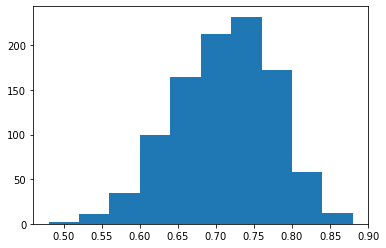

In [10]:
def cdfgen():
    data = [stats.bernoulli.rvs(.7) for _ in range(50)]
    return(sum(data)/50)
cdf = [cdfgen() for _ in range(1000)]
plt.hist(cdf)


**Solution Markdown**: $\newline$
The inverse of this function would flip p/q for the values of 0 and 1.$\newline$
Yes we could.